# RV curve of 51 Peg b

Figure 5.2 from Chapter 5 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Radial velocity curve of 51 Pegasi b from the compendium of Birkby et al. [2017, AJ, 153, 138](https://ui.adsabs.harvard.edu/abs/2017AJ....153..138B) with data from Table
1 downloaded from the VizieR [cat/J/AJ/153/138](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/AJ/153/138)

In [3]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [4]:
plotFile = 'Fig5_2.png' 

# graphic aspect ratio = width/height

aspect = 2.0 # 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Raw data

Data are from Birkby et al. via VizieR in ASCII format.  Data columns are:
 * Barycentric Julian Date
 * RV in m/s
 * RV uncertainty in m/s
 * Dataset code, one of {ELODIE, HARPS, HIRES, Lick6, Lick8, or Lick13}
 
Each of the RV data sets has a offset associated with it that will put all RV data onto the same
scale:
 * Lick13 = -21.70 m/s
 * Lick8 = -4.52 m/s
 * Lick6 = -14.64 m/s
 * ELODIE = +33251.59 m/s
 * HIRES = +2.24 m/s
 * HARPS = +33152.54 m/s
 
We add this offset as part of input processing in this cell.

See the `RVs/Birkby2017_readme.txt` file for notes about the original data set.  We renamed the data file
`Birkby2017_51peg_table1.txt` to distinguish it (original was `table1.dat`).

In [5]:
rvFile = 'RVs/Birkby2017_table1.txt' 

data = pd.read_csv(rvFile,sep=r'\s+',header=None,comment='#')

BJD = np.array(data[0])
rawRV = np.array(data[1])
eRV = np.array(data[2])
dataSet = np.array(data[3])

# Table of RV offsets, see RV/Birkby2017_readme.txt, table1.dat Note (2)

rvOffset = {'Lick13':-21.70,
            'Lick8':-4.52,
            'Lick6':-14.64,
            'ELODIE':33251.59,
            'HIRES':2.24,
            'HARPS':33152.54
           }

RV = np.zeros(len(rawRV))
for i in range(len(rawRV)):
    RV[i] = rawRV[i]+rvOffset[dataSet[i]]

# plotting limits

bjdMin = np.min(BJD)
bjdMax = np.max(BJD)
dBJD = bjdMax - bjdMin
tMin = bjdMin - 0.05*dBJD
tMax = bjdMax + 0.05*dBJD

rvMin = np.min(RV)
rvMax = np.max(RV)
dRV = rvMax - rvMin
vMin = rvMin - 0.05*dRV
vMax = rvMax + 0.05*dRV

## Fig 5.2 Phase-folded RV curve

Phase-fold the RV curve using
 * P = 4.2307869 days
 * t$_0$ = 2456021.256 days

Both following Birkby et al. 2017 Table 2

The RV parameters for showing the best-fit orbit are
 * K$_*$ = 54.93 m/s
 * $\gamma$ = 0.032 m/s

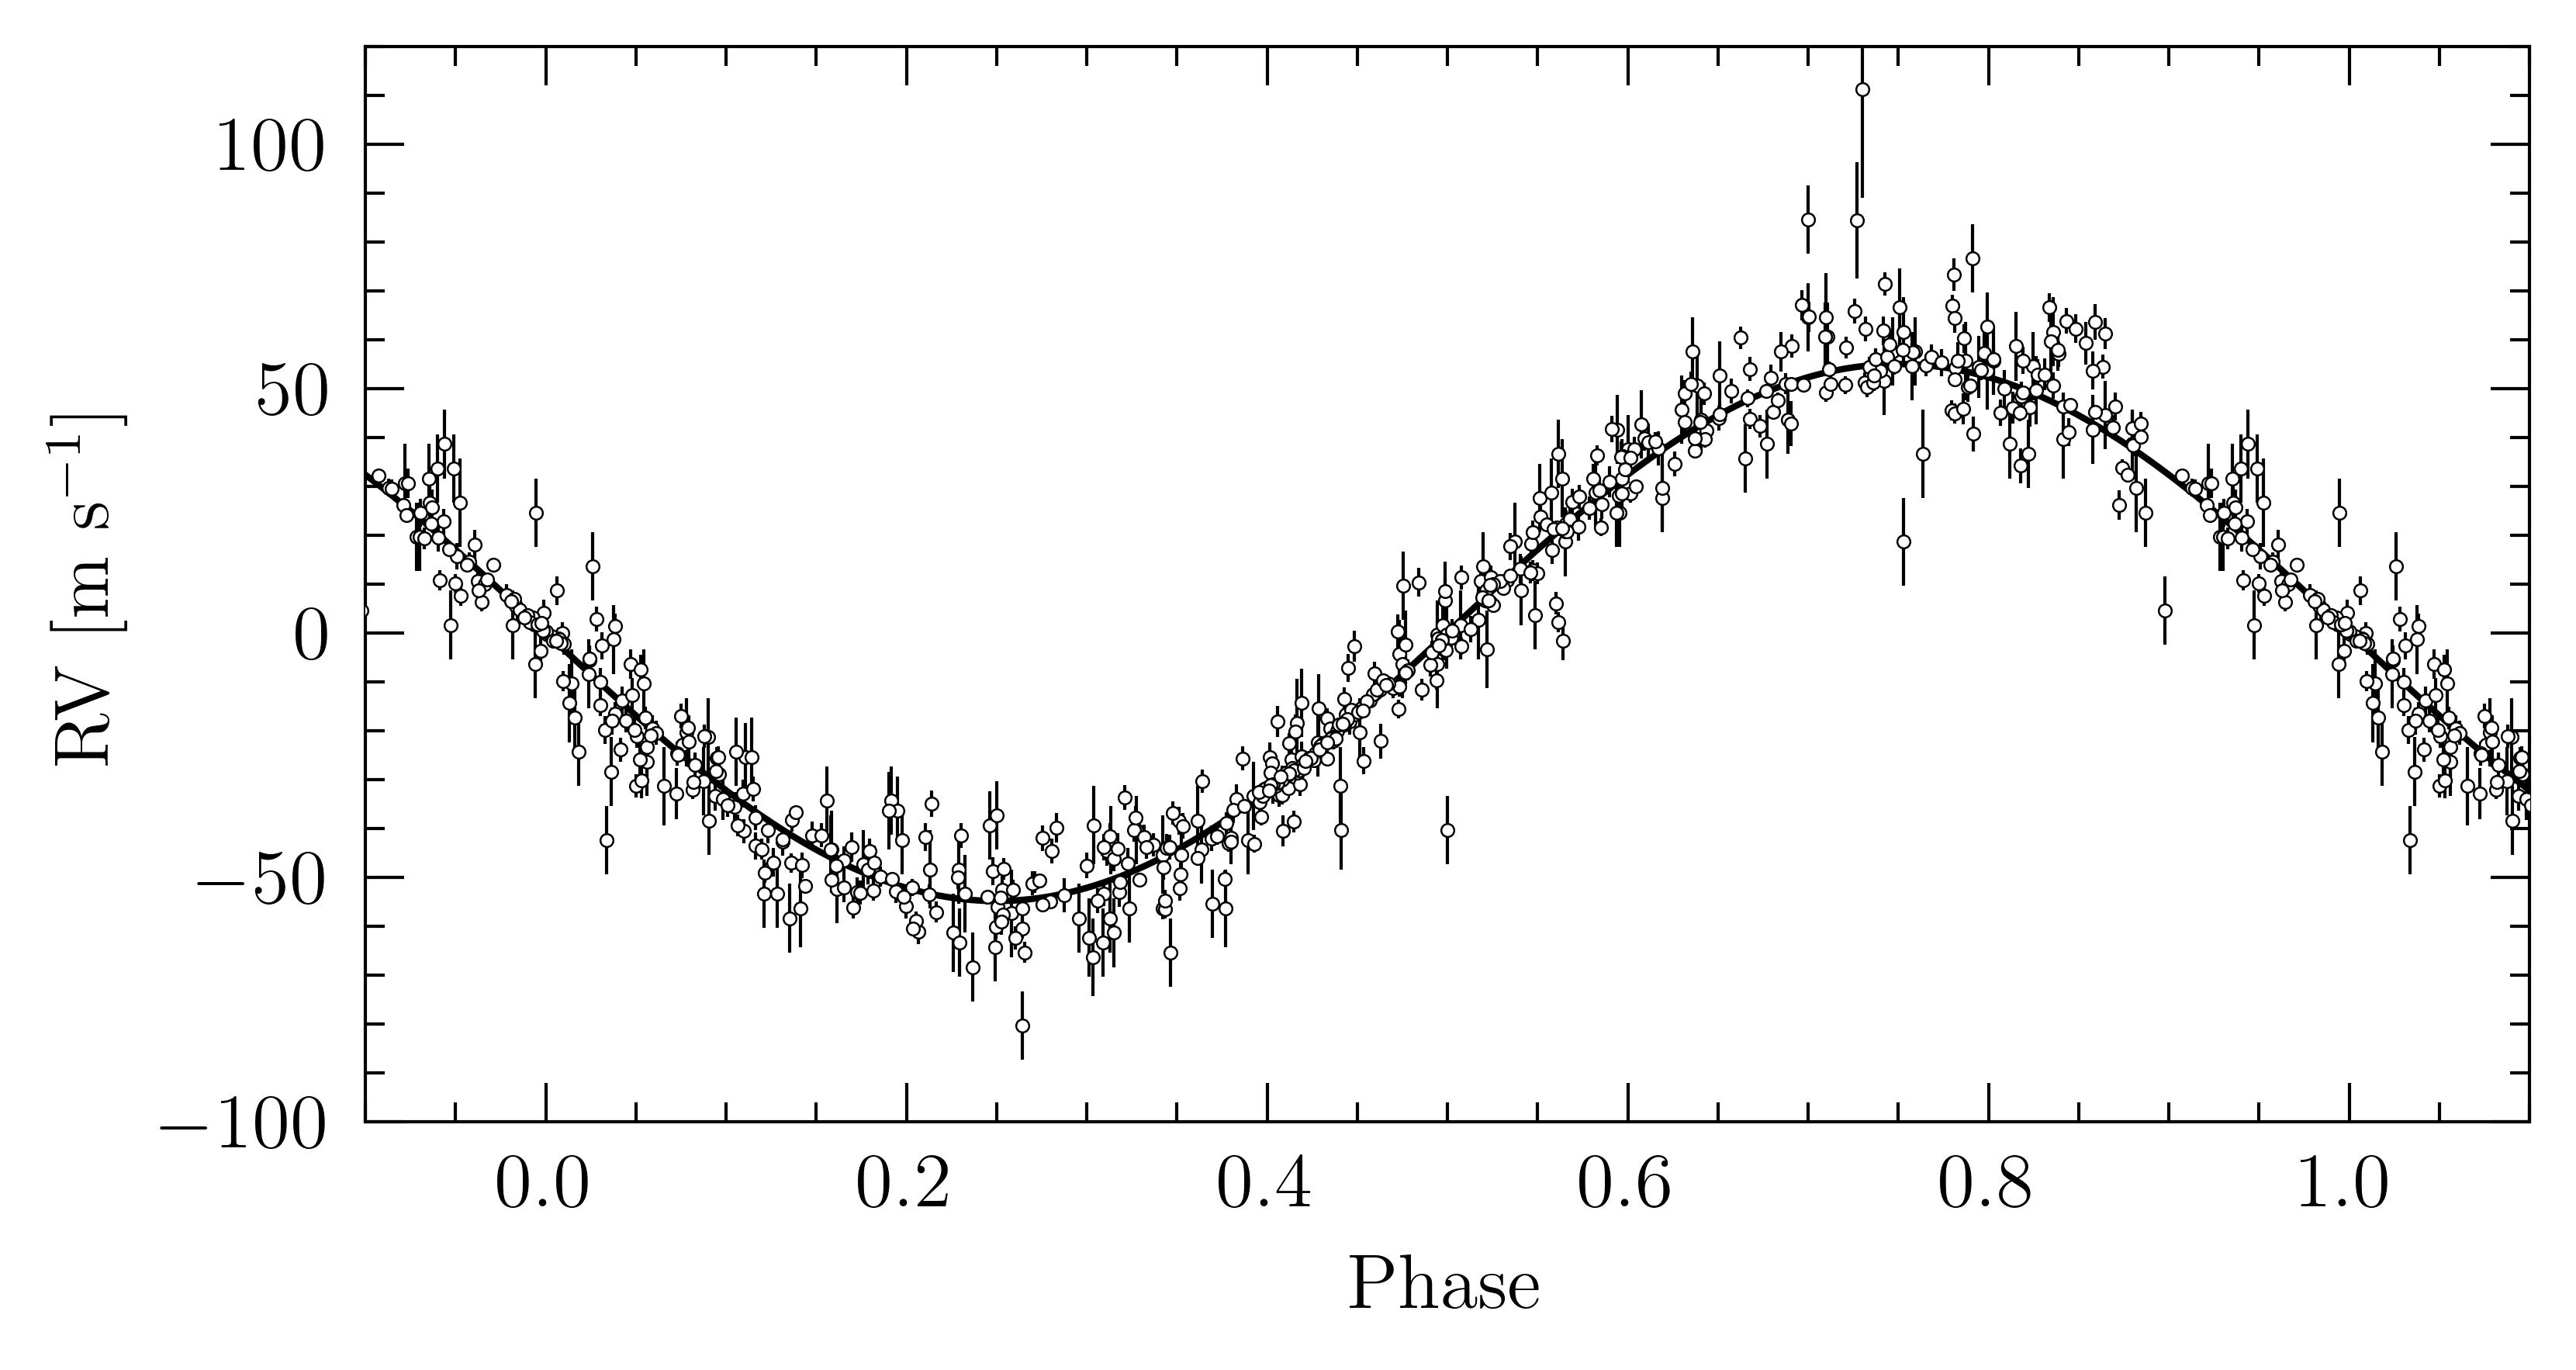

In [6]:
# Best-fit orbit parameters

P = 4.2307869 # days
t0 = 2456326.9314 # days
Kstar = 54.93 # RV semi=amplitude in m/s
gamma = 0.032 # zero-point offset in m/s

# Phase fold on the orbital period

rawPhase = (BJD-t0)/P

phase = rawPhase - np.floor(rawPhase)

minPhase = np.min(phase)
maxPhase = np.max(phase)

# phases RV best-fit

fitPhase = np.linspace(-0.1,1.1,1001)
fitRV = gamma - Kstar*np.sin(2.0*np.pi*fitPhase)

# make the plot

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(-0.1,1.1)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xlabel(r'Phase',fontsize=axisFontSize)

ax.set_ylim(-100,120)
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.set_ylabel(r'RV [m s$^{-1}$]',fontsize=axisFontSize)

ax.errorbar(phase+1,RV,xerr=None,yerr=eRV,fmt='o',ms=2,mfc='white',mec='black',mew=0.3,
            capsize=0.0,elinewidth=0.5,ecolor='black',zorder=10)

ax.errorbar(phase,RV,xerr=None,yerr=eRV,fmt='o',ms=2,mfc='white',mec='black',mew=0.3,
            capsize=0.0,elinewidth=0.5,ecolor='black',zorder=10)

ax.errorbar(phase-1,RV,xerr=None,yerr=eRV,fmt='o',ms=2,mfc='white',mec='black',mew=0.3,
            capsize=0.0,elinewidth=0.5,ecolor='black',zorder=10)

ax.plot(fitPhase,fitRV,'-',color='black',lw=1,zorder=8)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')